In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
import mplcursors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import folium
from folium.plugins import MarkerCluster
import warnings
warnings.filterwarnings("ignore")
import time

In [2]:
df = pd.read_csv("Complete Air Quality Dataset.csv")

In [3]:
pd.set_option('display.max_columns', 200)

In [4]:
df.columns

Index(['Parameter_Code', 'Latitude', 'Longitude', 'Datum', 'Pollutant_Name',
       'Units_of_Measure', 'Observation_Count', 'Observation_Percent',
       'Valid_Day_Count', 'Required_Day_Count', 'Arithmetic_Mean',
       'Arithmetic_Standard_Dev', '1st_Max_Value', '1st_Max_DateTime',
       '2nd_Max_Value', '2nd_Max_DateTime', '3rd_Max_Value',
       '3rd_Max_DateTime', '4th_Max_Value', '4th_Max_DateTime',
       '99th_Percentile', '98th_Percentile', '95th_Percentile',
       '90th_Percentile', '75th_Percentile', '50th_Percentile',
       'Local_Site_Name', 'State_Name', 'Date_of_Last_Change', 'Year',
       'City_Name', 'Particulate Matter (PM2.5 and PM10)',
       'PM2.5 and PM10 AQI', ' Status (PM2.5 and PM10)',
       'Carbon Monoxide (CO)', 'AQI (CO)', 'Status (CO)',
       'Sulfur Dioxide (SO2)', 'AQI (SO2)', 'Status (SO2)', 'Ozone (O3)',
       'AQI (O3)', 'Status (O3)', 'Nitrogen Dioxide (NO2)', 'AQI (NO2)',
       'Status (NO2)', 'Volatile Organic Compounds (VOCs)', 'AQI (VOC

In [5]:
import pandas as pd

# Set the option to display all rows
pd.options.display.max_rows = None

# Display all rows in df
print(df.dtypes)

Parameter_Code                               int64
Latitude                                   float64
Longitude                                  float64
Datum                                       object
Pollutant_Name                              object
Units_of_Measure                            object
Observation_Count                            int64
Observation_Percent                          int64
Valid_Day_Count                              int64
Required_Day_Count                           int64
Arithmetic_Mean                            float64
Arithmetic_Standard_Dev                    float64
1st_Max_Value                              float64
1st_Max_DateTime                            object
2nd_Max_Value                              float64
2nd_Max_DateTime                            object
3rd_Max_Value                              float64
3rd_Max_DateTime                            object
4th_Max_Value                              float64
4th_Max_DateTime               

In [6]:
# Convert '1st_Max_DateTime' column to datetime dtype
df['1st_Max_DateTime'] = pd.to_datetime(df['1st_Max_DateTime'], dayfirst=True)

# Convert '2nd_Max_DateTime' column to datetime dtype
df['2nd_Max_DateTime'] = pd.to_datetime(df['2nd_Max_DateTime'], dayfirst=True)

# Convert '3rd_Max_DateTime' column to datetime dtype
df['3rd_Max_DateTime'] = pd.to_datetime(df['3rd_Max_DateTime'], dayfirst=True)

# Convert '4th_Max_DateTime' column to datetime dtype
df['4th_Max_DateTime'] = pd.to_datetime(df['4th_Max_DateTime'], dayfirst=True)

# Convert 'Date_of_Last_Change' column to datetime dtype
df['Date_of_Last_Change'] = pd.to_datetime(df['Date_of_Last_Change'], dayfirst=True)



In [7]:
import pandas as pd

# Set the option to display all rows
pd.options.display.max_rows = None

# Display all rows in df
print(df.dtypes)

Parameter_Code                                      int64
Latitude                                          float64
Longitude                                         float64
Datum                                              object
Pollutant_Name                                     object
Units_of_Measure                                   object
Observation_Count                                   int64
Observation_Percent                                 int64
Valid_Day_Count                                     int64
Required_Day_Count                                  int64
Arithmetic_Mean                                   float64
Arithmetic_Standard_Dev                           float64
1st_Max_Value                                     float64
1st_Max_DateTime                           datetime64[ns]
2nd_Max_Value                                     float64
2nd_Max_DateTime                           datetime64[ns]
3rd_Max_Value                                     float64
3rd_Max_DateTi

In [8]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Parameter_Code,19873.0,51353.321995,12115.0,43504.0,43828.0,45805.0,88502.0,18283.601271
Latitude,19873.0,41.984322,40.57811,40.816,42.09142,42.99328,44.980577,1.238841
Longitude,19873.0,-75.464175,-79.58961,-77.54817,-73.96661,-73.87809,-72.71238,2.176878
Observation_Count,19873.0,2819.111508,1.0,54.0,60.0,1958.0,104780.0,10552.481225
Observation_Percent,19873.0,88.04881,0.0,88.0,95.0,98.0,100.0,17.800416
Valid_Day_Count,19873.0,131.615508,0.0,54.0,59.0,211.0,366.0,121.694114
Required_Day_Count,19873.0,147.968601,3.0,61.0,61.0,245.0,366.0,128.451446
Arithmetic_Mean,19867.0,11.570636,-0.033008,0.006207,0.138095,1.417425,9563.888889,179.637646
Arithmetic_Standard_Dev,19867.0,7.410561,0.0,0.011655,0.075053,1.10299,11681.50465,180.572282
1st_Max_Value,19873.0,98.74388,0.0,0.077,0.5,8.0,99900.0,2313.27685


In [9]:
# Set the option to display all rows
pd.options.display.max_rows = 5
df

,Parameter_Code,Latitude,Longitude,Datum,Pollutant_Name,Units_of_Measure,Observation_Count,Observation_Percent,Valid_Day_Count,Required_Day_Count,Arithmetic_Mean,Arithmetic_Standard_Dev,1st_Max_Value,1st_Max_DateTime,2nd_Max_Value,2nd_Max_DateTime,3rd_Max_Value,3rd_Max_DateTime,4th_Max_Value,4th_Max_DateTime,99th_Percentile,98th_Percentile,95th_Percentile,90th_Percentile,75th_Percentile,50th_Percentile,Local_Site_Name,State_Name,Date_of_Last_Change,Year,City_Name,Particulate Matter (PM2.5 and PM10),PM2.5 and PM10 AQI,Status (PM2.5 and PM10),Carbon Monoxide (CO),AQI (CO),Status (CO),Sulfur Dioxide (SO2),AQI (SO2),Status (SO2),Ozone (O3),AQI (O3),Status (O3),Nitrogen Dioxide (NO2),AQI (NO2),Status (NO2),Volatile Organic Compounds (VOCs),AQI (VOCs),Status (VOCs),Methane (CH4),AQI (CH4),Status (CH4),Hydrocarbons (HC),Concentration (HC),Status (HC),Hazardous Air Pollutants (HAPs),Concentration (HAPs),Status (HAPs),Lead (Pb),Concentration (Pb),Status (Pb),Mercury (Hg),Concentration (Hg),Status (Hg),Ammonia (NH3),Concentration (NH3),Status (NH3),Perfluorocarbons (PFCs),Concentration (PFCs),Status (PFCs),Chlorofluorocarbons (CFCs),Concentration,Status (CFCs),Polycyclic Aromatic Hydrocarbons (PAHs),Concentration (PAHs),Status (PAHs),AQI,AQI Status
0,43813,40.580270,-74.198320,WGS84,Hazardous Air Pollutants (HAPs),Parts per billion Carbon,23,38,23,61,0.000000,0.000000,0.0,2014-05-05,0.0,2014-05-11,0.0,2014-05-17,0.0,2014-05-23,0.0,0.0,0.0,0.0,0.0,0.0,FRESHKILLS WEST,New York,2020-05-21,2014,New York,0,0,Good,0,0,Good,0,0,Good,0,0,Good,0,0,Good,0,0,Good,0,0,Low,0,0,Low,23,23,Moderate,0,0,Low,0,0,Low,0,0,Low,0,0,Low,0,0,Low,0,0,Low,23,Good
1,43813,40.580270,-74.198320,WGS84,Hazardous Air Pollutants (HAPs),Parts per billion Carbon,47,77,47,61,0.000000,0.000000,0.0,2013-01-04,0.0,2013-01-10,0.0,2013-01-16,0.0,2013-01-22,0.0,0.0,0.0,0.0,0.0,0.0,FRESHKILLS WEST,New York,2020-05-21,2013,New York,0,0,Good,0,0,Good,0,0,Good,0,0,Good,0,0,Good,0,0,Good,0,0,Low,0,0,Low,47,47,Moderate,0,0,Low,0,0,Low,0,0,Low,0,0,Low,0,0,Low,0,0,Low,47,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19871,88501,44.980577,-74.695005,WGS84,Particulate Matter (PM2.5 and PM10),Micrograms/cubic meter (LC),8555,98,355,365,3.738048,4.205200,57.9,2015-08-07,46.7,2015-09-03,45.2,2015-09-06,40.9,2015-09-06,18.8,15.4,11.6,8.8,5.3,2.6,Y001,New York,2020-05-21,2015,New York,355,201,Very Unhealthy,0,0,Good,0,0,Good,0,0,Good,0,0,Good,0,0,Good,0,0,Low,0,0,Low,0,0,Low,0,0,Low,0,0,Low,0,0,Low,0,0,Low,0,0,Low,0,0,Low,355,Hazardous
19872,88501,44.980577,-74.695005,WGS84,Particulate Matter (PM2.5 and PM10),Micrograms/cubic meter (LC),8700,99,363,365,3.697874,3.246973,24.7,2014-08-05,24.3,2014-07-01,22.7,2014-07-01,22.6,2014-07-01,14.1,12.4,9.9,8.1,5.4,3.0,Y001,New York,2020-05-21,2014,New York,363,207,Very Unhealthy,0,0,Good,0,0,Good,0,0,Good,0,0,Good,0,0,Good,0,0,Low,0,0,Low,0,0,Low,0,0,Low,0,0,Low,0,0,Low,0,0,Low,0,0,Low,0,0,Low,363,Hazardous


In [10]:
summary_stats = df.describe()

In [11]:
missing_values = df.isnull().sum()


In [12]:
#check for missing values

df.isna()

,Parameter_Code,Latitude,Longitude,Datum,Pollutant_Name,Units_of_Measure,Observation_Count,Observation_Percent,Valid_Day_Count,Required_Day_Count,Arithmetic_Mean,Arithmetic_Standard_Dev,1st_Max_Value,1st_Max_DateTime,2nd_Max_Value,2nd_Max_DateTime,3rd_Max_Value,3rd_Max_DateTime,4th_Max_Value,4th_Max_DateTime,99th_Percentile,98th_Percentile,95th_Percentile,90th_Percentile,75th_Percentile,50th_Percentile,Local_Site_Name,State_Name,Date_of_Last_Change,Year,City_Name,Particulate Matter (PM2.5 and PM10),PM2.5 and PM10 AQI,Status (PM2.5 and PM10),Carbon Monoxide (CO),AQI (CO),Status (CO),Sulfur Dioxide (SO2),AQI (SO2),Status (SO2),Ozone (O3),AQI (O3),Status (O3),Nitrogen Dioxide (NO2),AQI (NO2),Status (NO2),Volatile Organic Compounds (VOCs),AQI (VOCs),Status (VOCs),Methane (CH4),AQI (CH4),Status (CH4),Hydrocarbons (HC),Concentration (HC),Status (HC),Hazardous Air Pollutants (HAPs),Concentration (HAPs),Status (HAPs),Lead (Pb),Concentration (Pb),Status (Pb),Mercury (Hg),Concentration (Hg),Status (Hg),Ammonia (NH3),Concentration (NH3),Status (NH3),Perfluorocarbons (PFCs),Concentration (PFCs),Status (PFCs),Chlorofluorocarbons (CFCs),Concentration,Status (CFCs),Polycyclic Aromatic Hydrocarbons (PAHs),Concentration (PAHs),Status (PAHs),AQI,AQI Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19871,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19872,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [62]:
# Check the shape of the dataset 
df.shape

(19873, 78)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19873 entries, 0 to 19872
Data columns (total 78 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Parameter_Code                           19873 non-null  int64         
 1   Latitude                                 19873 non-null  float64       
 2   Longitude                                19873 non-null  float64       
 3   Datum                                    19873 non-null  object        
 4   Pollutant_Name                           19873 non-null  object        
 5   Units_of_Measure                         19873 non-null  object        
 6   Observation_Count                        19873 non-null  int64         
 7   Observation_Percent                      19873 non-null  int64         
 8   Valid_Day_Count                          19873 non-null  int64         
 9   Required_Day_Count                     

In [66]:
# Set the option to display all rows
pd.options.display.max_rows = None
df.nunique()

Parameter_Code                               134
Latitude                                     102
Longitude                                    102
Datum                                          2
Pollutant_Name                                15
Units_of_Measure                               7
Observation_Count                           2549
Observation_Percent                           98
Valid_Day_Count                              342
Required_Day_Count                            93
Arithmetic_Mean                            13245
Arithmetic_Standard_Dev                    14333
1st_Max_Value                               2438
1st_Max_DateTime                            2364
2nd_Max_Value                               2233
2nd_Max_DateTime                            2502
3rd_Max_Value                               2107
3rd_Max_DateTime                            2639
4th_Max_Value                               2007
4th_Max_DateTime                            2725
99th_Percentile     

In [48]:
# Check for the various column in the dataset

df.columns

Index(['Parameter_Code', 'Latitude', 'Longitude', 'Datum', 'Pollutant_Name',
       'Units_of_Measure', 'Observation_Count', 'Observation_Percent',
       'Valid_Day_Count', 'Required_Day_Count', 'Arithmetic_Mean',
       'Arithmetic_Standard_Dev', '1st_Max_Value', '1st_Max_DateTime',
       '2nd_Max_Value', '2nd_Max_DateTime', '3rd_Max_Value',
       '3rd_Max_DateTime', '4th_Max_Value', '4th_Max_DateTime',
       '99th_Percentile', '98th_Percentile', '95th_Percentile',
       '90th_Percentile', '75th_Percentile', '50th_Percentile',
       'Local_Site_Name', 'State_Name', 'Date_of_Last_Change', 'Year',
       'City_Name', 'Particulate Matter (PM2.5 and PM10)',
       'PM2.5 and PM10 AQI', ' Status (PM2.5 and PM10)',
       'Carbon Monoxide (CO)', 'AQI (CO)', 'Status (CO)',
       'Sulfur Dioxide (SO2)', 'AQI (SO2)', 'Status (SO2)', 'Ozone (O3)',
       'AQI (O3)', 'Status (O3)', 'Nitrogen Dioxide (NO2)', 'AQI (NO2)',
       'Status (NO2)', 'Volatile Organic Compounds (VOCs)', 'AQI (VOC

In [70]:
# Set the option to display all rows
pd.options.display.max_rows = 5
df

,Particulate Matter (PM2.5 and PM10),Carbon Monoxide (CO),Sulfur Dioxide (SO2),Ozone (O3),Nitrogen Dioxide (NO2),Volatile Organic Compounds (VOCs),Methane (CH4),Hydrocarbons (HC),Hazardous Air Pollutants (HAPs),Lead (Pb),Mercury (Hg),Ammonia (NH3),Perfluorocarbons (PFCs),Chlorofluorocarbons (CFCs),Polycyclic Aromatic Hydrocarbons (PAHs)
0,0,0,0,0,0,0,0,0,23,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,47,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19871,355,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19872,363,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
df.describe()

,Parameter_Code,Latitude,Longitude,Observation_Count,Observation_Percent,Valid_Day_Count,Required_Day_Count,Arithmetic_Mean,Arithmetic_Standard_Dev,1st_Max_Value,2nd_Max_Value,3rd_Max_Value,4th_Max_Value,99th_Percentile,98th_Percentile,95th_Percentile,90th_Percentile,75th_Percentile,50th_Percentile,Year,Particulate Matter (PM2.5 and PM10),Carbon Monoxide (CO),Sulfur Dioxide (SO2),AQI.1,Ozone (O3),Nitrogen Dioxide (NO2),AQI (NO2),Volatile Organic Compounds (VOCs),AQI (VOCs),Methane (CH4),AQI (CH4),Hydrocarbons (HC),Concentration (HC),Hazardous Air Pollutants (HAPs),Concentration (HAPs),Lead (Pb),Concentration (Pb),Mercury (Hg),Concentration (Hg),Ammonia (NH3),Concentration (NH3),Perfluorocarbons (PFCs),Concentration (PFCs),Chlorofluorocarbons (CFCs),Concentration,Polycyclic Aromatic Hydrocarbons (PAHs),Concentration (PAHs),Air Quality Index
count,19873.000000,19873.000000,19873.000000,19873.000000,19873.000000,19873.000000,19873.000000,19867.000000,19867.000000,19873.00000,19867.000000,19853.000000,19825.000000,19827.000000,19827.000000,19827.000000,19827.000000,19827.000000,19827.000000,19873.000000,19873.000000,19873.000000,19873.000000,19873.000000,19873.000000,19873.000000,19873.000000,19873.000000,19873.000000,19873.000000,19873.000000,19873.000000,19873.000000,19873.000000,19873.000000,19873.00000,19873.00000,19873.000000,19873.000000,19873.000000,19873.000000,19873.000000,19873.000000,19873.000000,19873.000000,19873.000000,19873.000000,19873.000000
mean,51353.321995,41.984322,-75.464175,2819.111508,88.048810,131.615508,147.968601,11.570636,7.410561,98.74388,85.129973,76.652761,72.097929,42.626499,35.377874,24.319964,17.802776,13.667235,9.113656,2012.867257,54.733810,5.879082,30.541941,18.183012,24.566548,4.281487,1.880139,17.014542,17.076788,0.554722,0.554722,0.697328,0.697328,14.206058,14.206058,1.10859,1.10859,0.139637,0.139637,0.791526,0.791526,1.429678,1.429678,0.007397,0.007397,0.634378,0.634378,156.586726
std,18283.601271,1.238841,2.176878,10552.481225,17.800416,121.694114,128.451446,179.637646,180.572282,2313.27685,2136.350380,1936.899088,1845.994487,991.802115,825.074254,471.194749,293.773707,189.125970,129.719131,4.865377,186.248099,45.132182,98.986709,58.644453,85.754565,37.692696,16.386569,28.841295,29.596934,13.443755,13.443755,7.504449,7.504449,26.748989,26.748989,10.44972,10.44972,3.266152,3.266152,9.344254,9.344254,8.722980,8.722980,0.496156,0.496156,5.709457,5.709457,194.832664
min,12115.000000,40.578110,-79.589610,1.000000,0.000000,0.000000,3.000000,-0.033008,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43504.000000,40.816000,-77.548170,54.000000,88.000000,54.000000,61.000000,0.006207,0.011655,0.07700,0.061000,0.024000,0.013000,0.071000,0.062000,0.031000,0.006000,0.000000,0.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000
50%,43828.000000,42.091420,-73.966610,60.000000,95.000000,59.000000,61.000000,0.138095,0.075053,0.50000,0.388000,0.300000,0.300000,0.500000,0.400000,0.300000,0.264000,0.200000,0.100000,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000
75%,45805.000000,42.993280,-73.878090,1958.000000,98.000000,211.000000,245.000000,1.417425,1.102990,8.00000,6.040000,5.300000,4.800000,5.500000,4.500000,3.400000,2.700000,3.300000,1.100000,2017.000000,0.000000,0.0000

In [42]:
# Check the shape of the dataset again to confirm

df.shape

(19873, 62)

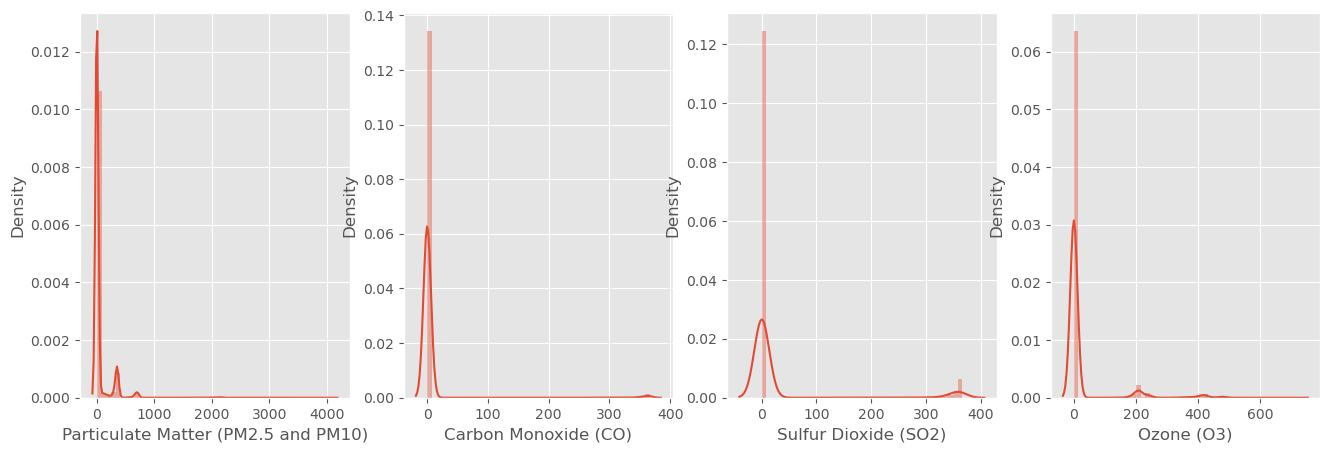

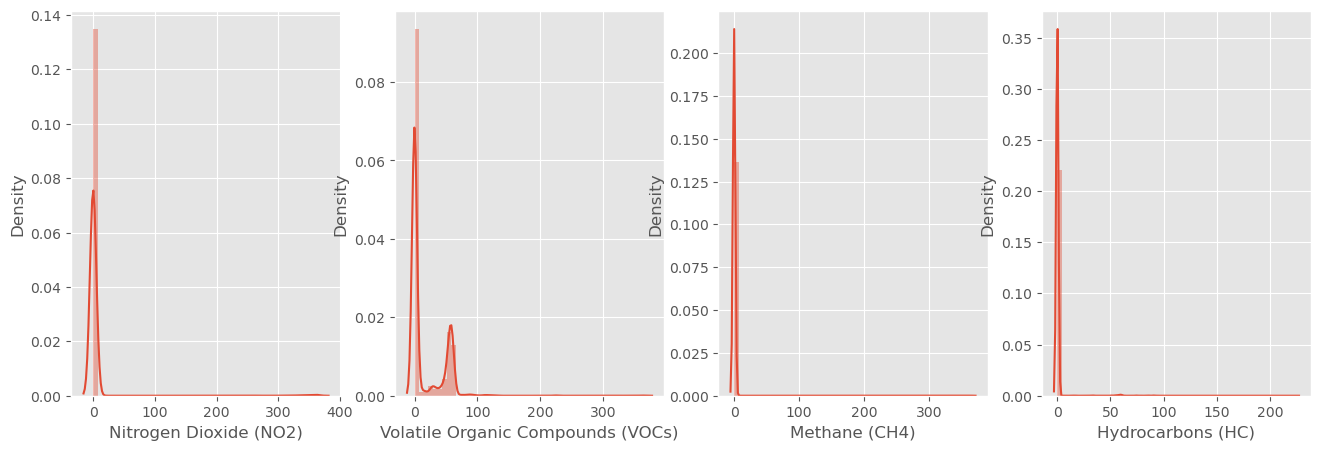

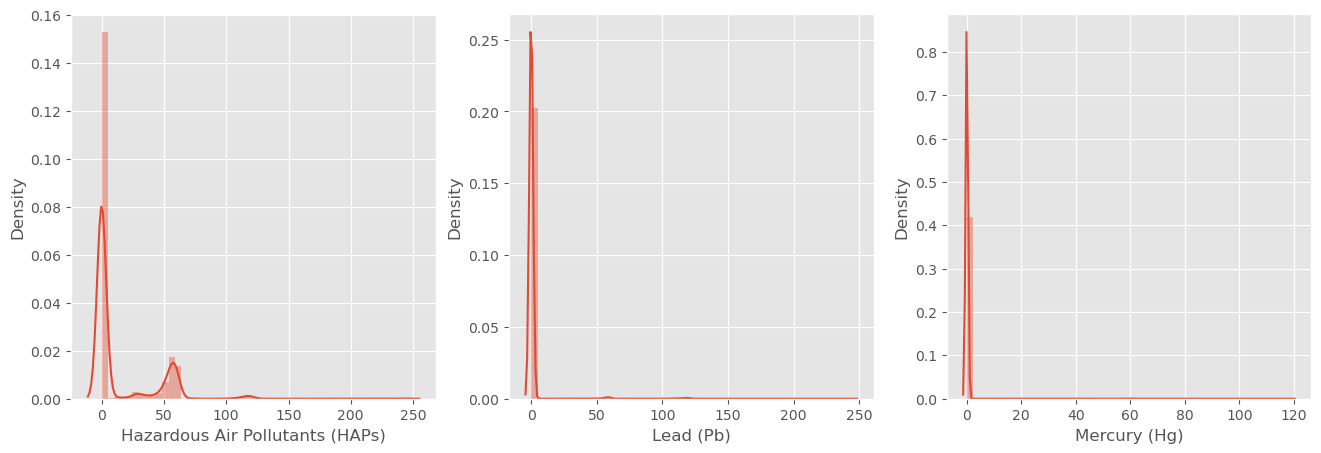

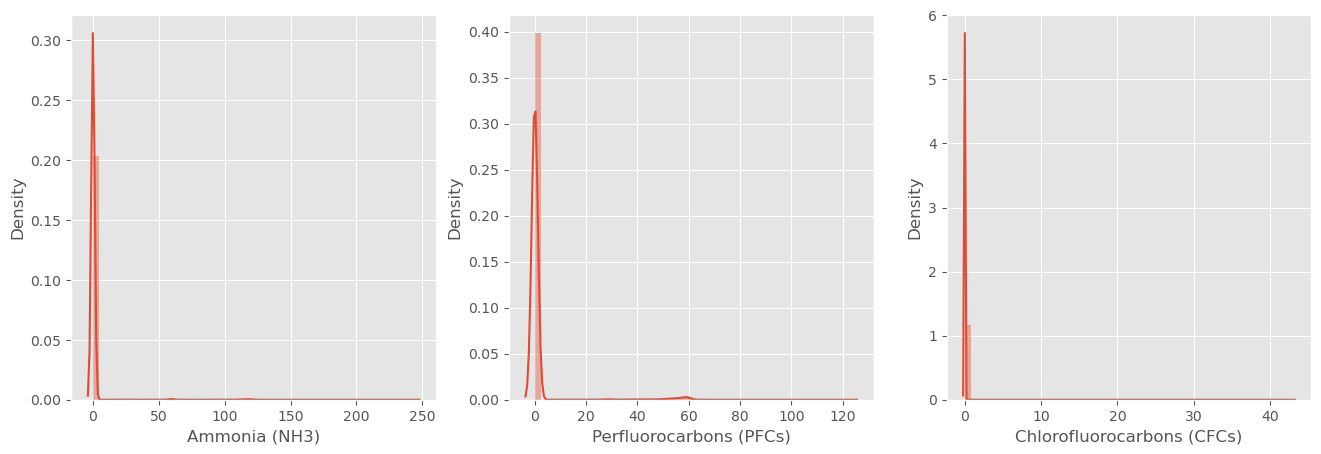

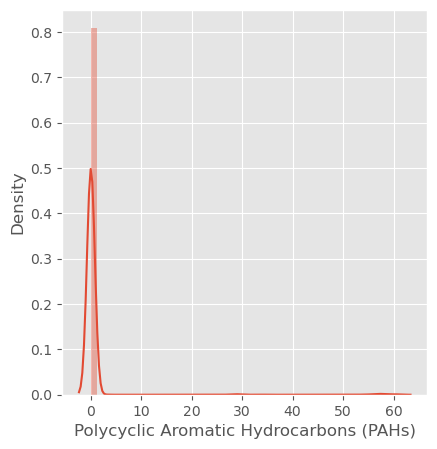

In [65]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Disable warnings
warnings.filterwarnings('ignore')

# Set up the figure
plt.figure(figsize=(16, 5))

# First row of subplots
plt.subplot(1, 4, 1)
sns.distplot(df['Particulate Matter (PM2.5 and PM10)'])
plt.subplot(1, 4, 2)
sns.distplot(df['Carbon Monoxide (CO)'])
plt.subplot(1, 4, 3)
sns.distplot(df['Sulfur Dioxide (SO2)'])
plt.subplot(1, 4, 4)
sns.distplot(df['Ozone (O3)'])
plt.show()

# Second row of subplots
plt.figure(figsize=(16, 5))
plt.subplot(1, 4, 1)
sns.distplot(df['Nitrogen Dioxide (NO2)'])
plt.subplot(1, 4, 2)
sns.distplot(df['Volatile Organic Compounds (VOCs)'])
plt.subplot(1, 4, 3)
sns.distplot(df['Methane (CH4)'])
plt.subplot(1, 4, 4)
sns.distplot(df['Hydrocarbons (HC)'])
plt.show()

# Third row of subplots
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
sns.distplot(df['Hazardous Air Pollutants (HAPs)'])
plt.subplot(1, 3, 2)
sns.distplot(df['Lead (Pb)'])
plt.subplot(1, 3, 3)
sns.distplot(df['Mercury (Hg)'])
plt.show()

# Fourth row of subplots
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
sns.distplot(df['Ammonia (NH3)'])
plt.subplot(1, 3, 2)
sns.distplot(df['Perfluorocarbons (PFCs)'])
plt.subplot(1, 3, 3)
sns.distplot(df['Chlorofluorocarbons (CFCs)'])
plt.show()

# Fifth row of subplots
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
sns.distplot(df['Polycyclic Aromatic Hydrocarbons (PAHs)'])
plt.show()


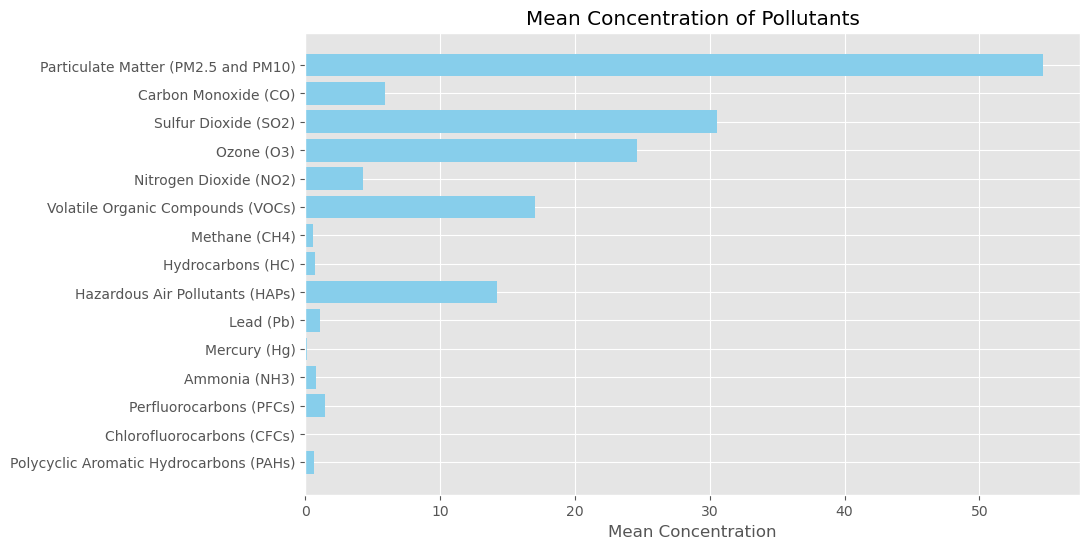

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df

# Define the pollutants you want to include in the bar chart
pollutants = [
    'Particulate Matter (PM2.5 and PM10)',
    'Carbon Monoxide (CO)',
    'Sulfur Dioxide (SO2)',
    'Ozone (O3)',
    'Nitrogen Dioxide (NO2)',
    'Volatile Organic Compounds (VOCs)',
    'Methane (CH4)',
    'Hydrocarbons (HC)',
    'Hazardous Air Pollutants (HAPs)',
    'Lead (Pb)',
    'Mercury (Hg)',
    'Ammonia (NH3)',
    'Perfluorocarbons (PFCs)',
    'Chlorofluorocarbons (CFCs)',
    'Polycyclic Aromatic Hydrocarbons (PAHs)'
]

# Calculate the mean concentration for each pollutant
pollutant_means = []
for pollutant in pollutants:
    mean_concentration = df[pollutant].mean()
    pollutant_means.append(mean_concentration)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(pollutants, pollutant_means, color='skyblue')
plt.xlabel('Mean Concentration')
plt.title('Mean Concentration of Pollutants')
plt.gca().invert_yaxis()  # Invert y-axis to display pollutants from top to bottom
plt.show()



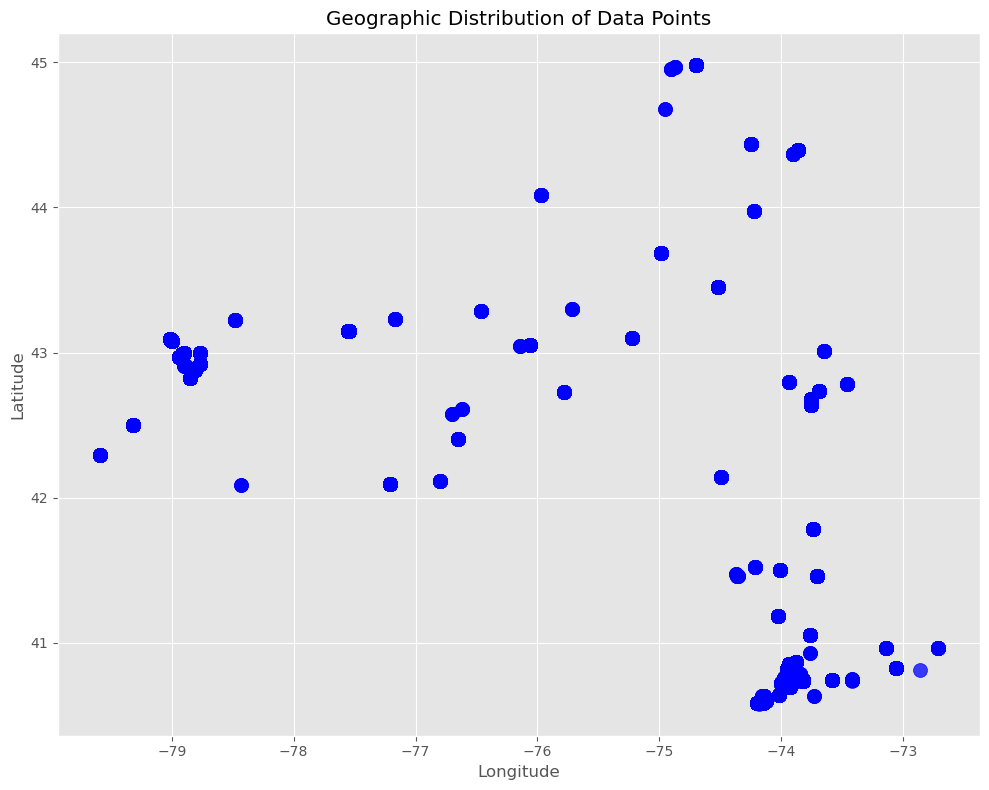

In [45]:
# Select relevant columns
df_geo = df[['Latitude', 'Longitude']]

# Define marker size based on the count of occurrences for each datum
datum_counts = df_geo['Longitude'].count()  # Just to normalize for now
max_count = datum_counts
marker_sizes = 100 * (datum_counts / max_count)  # Scale marker sizes to make them more visible

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(df_geo['Longitude'], df_geo['Latitude'], s=marker_sizes, c='blue', alpha=0.5)

plt.title('Geographic Distribution of Data Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()

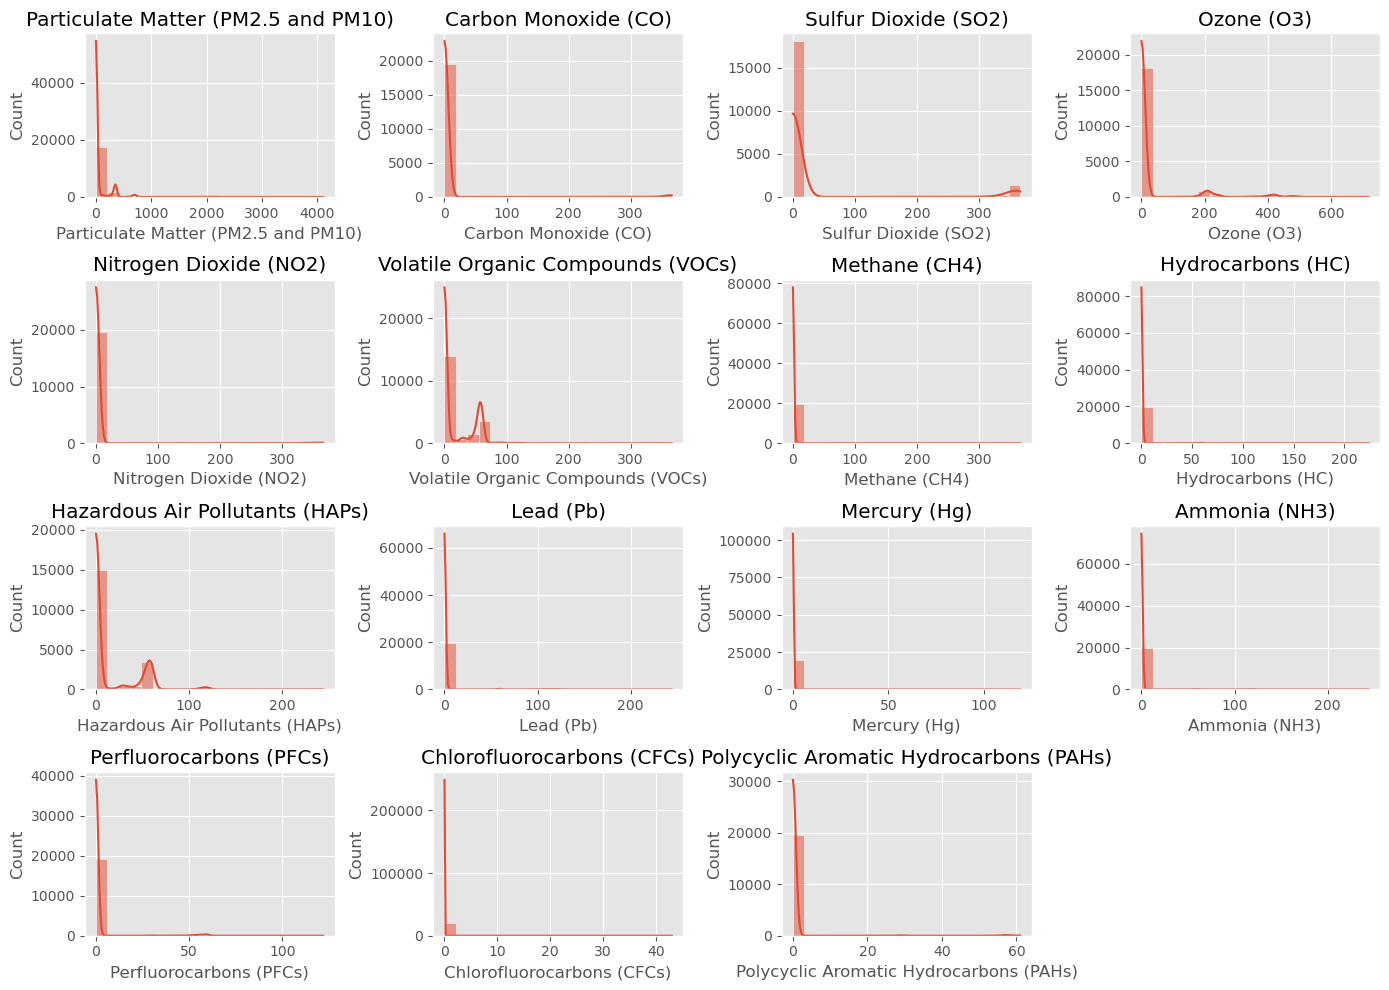

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axis
plt.figure(figsize=(14, 10))

# Loop through each pollutant and plot histogram
for i, col in enumerate(df2.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df2[col], bins=20, kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


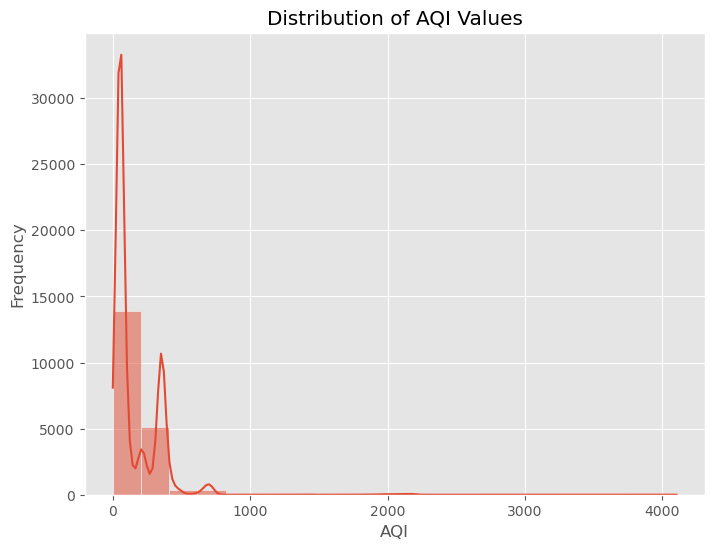

In [73]:
plt.figure(figsize=(8, 6))
sns.histplot(df['AQI'], bins=20, kde=True)
plt.title('Distribution of AQI Values')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()


In [139]:
import pandas as pd

# Select only the specified columns
selected_columns = [
    'Particulate Matter (PM2.5 and PM10)',
    'Carbon Monoxide (CO)',
    'Sulfur Dioxide (SO2)',
    'Ozone (O3)',
    'Nitrogen Dioxide (NO2)',
    'Volatile Organic Compounds (VOCs)',
    'Methane (CH4)',
    'Hydrocarbons (HC)',
    'Hazardous Air Pollutants (HAPs)',
    'Lead (Pb)',
    'Mercury (Hg)',
    'Ammonia (NH3)',
    'Perfluorocarbons (PFCs)',
    'Chlorofluorocarbons (CFCs)',
    'Polycyclic Aromatic Hydrocarbons (PAHs)'
]

selected_df = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Display the correlation matrix
print(correlation_matrix)



                                         Particulate Matter (PM2.5 and PM10)  \
Particulate Matter (PM2.5 and PM10)                                 1.000000   
Carbon Monoxide (CO)                                               -0.038283   
...                                                                      ...   
Chlorofluorocarbons (CFCs)                                         -0.004381   
Polycyclic Aromatic Hydrocarbons (PAHs)                            -0.032654   

                                         Carbon Monoxide (CO)  \
Particulate Matter (PM2.5 and PM10)                 -0.038283   
Carbon Monoxide (CO)                                 1.000000   
...                                                       ...   
Chlorofluorocarbons (CFCs)                          -0.001942   
Polycyclic Aromatic Hydrocarbons (PAHs)             -0.014474   

                                         Sulfur Dioxide (SO2)  Ozone (O3)  \
Particulate Matter (PM2.5 and PM10)                

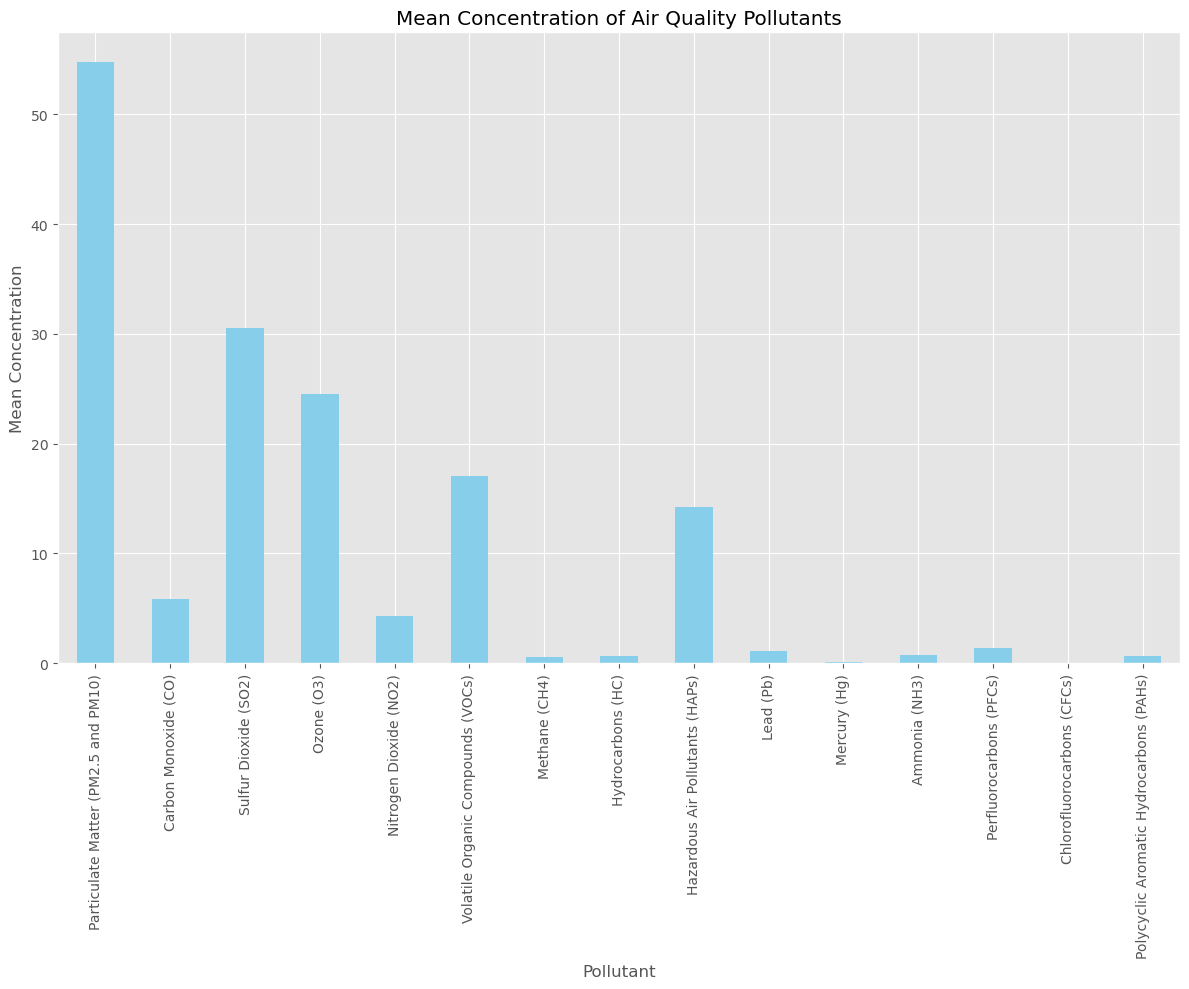

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
df = pd.read_csv("Complete Air Quality Dataset.csv")

# Specify the columns for the pollutants you want to visualize
pollutants = [
    'Particulate Matter (PM2.5 and PM10)',
    'Carbon Monoxide (CO)',
    'Sulfur Dioxide (SO2)',
    'Ozone (O3)',
    'Nitrogen Dioxide (NO2)',
    'Volatile Organic Compounds (VOCs)',
    'Methane (CH4)',
    'Hydrocarbons (HC)',
    'Hazardous Air Pollutants (HAPs)',
    'Lead (Pb)',
    'Mercury (Hg)',
    'Ammonia (NH3)',
    'Perfluorocarbons (PFCs)',
    'Chlorofluorocarbons (CFCs)',
    'Polycyclic Aromatic Hydrocarbons (PAHs)'
]

# Get the mean concentration values for each pollutant
mean_concentrations = df[pollutants].mean()

# Create the bar chart
plt.figure(figsize=(12, 10))
mean_concentrations.plot(kind='bar', color='skyblue')
plt.xlabel('Pollutant')
plt.ylabel('Mean Concentration')
plt.title('Mean Concentration of Air Quality Pollutants')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


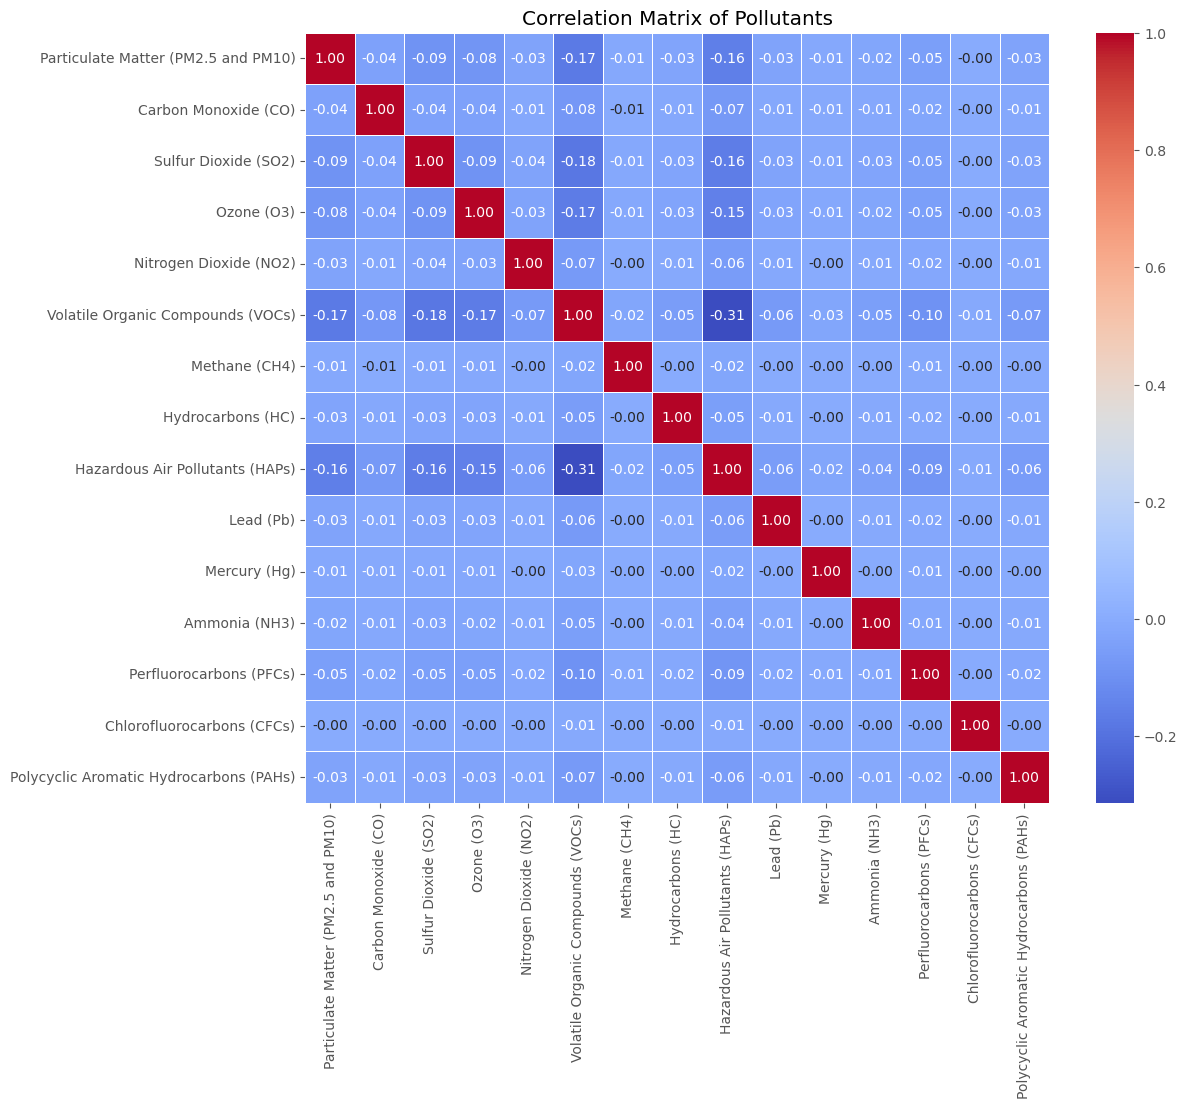

In [72]:
# Calculate correlation matrix
corr_matrix = df2.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Pollutants')
plt.show()


In [10]:
y = df['AQI']
x = df[
    [
        'Particulate Matter (PM2.5 and PM10)',
        'Carbon Monoxide (CO)',
        'Sulfur Dioxide (SO2)',
        'Ozone (O3)',
        'Nitrogen Dioxide (NO2)',
        'Volatile Organic Compounds (VOCs)',
        'Methane (CH4)',
        'Hydrocarbons (HC)',
        'Hazardous Air Pollutants (HAPs)',
        'Lead (Pb)',
        'Mercury (Hg)',
        'Ammonia (NH3)',
        'Perfluorocarbons (PFCs)',
        'Chlorofluorocarbons (CFCs)',
        'Polycyclic Aromatic Hydrocarbons (PAHs)'
    ]
]


In [11]:
# Define the predictor variables (x) and the target variable (y) using the columns from your DataFrame (df)
x = df[['Particulate Matter (PM2.5 and PM10)', 'Carbon Monoxide (CO)', 'Sulfur Dioxide (SO2)', 'Ozone (O3)', 'Nitrogen Dioxide (NO2)', 'Volatile Organic Compounds (VOCs)', 'Methane (CH4)', 'Hydrocarbons (HC)', 'Hazardous Air Pollutants (HAPs)', 'Lead (Pb)', 'Mercury (Hg)', 'Ammonia (NH3)', 'Perfluorocarbons (PFCs)', 'Chlorofluorocarbons (CFCs)', 'Polycyclic Aromatic Hydrocarbons (PAHs)']]  # Predictor variables (pollutants)
y = df['AQI']  # Target variable (AQI)

# Display the shape of x and y
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)




Shape of x: (19873, 15)
Shape of y: (19873,)


In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set - X:", X_train.shape, "y:", y_train.shape)
print("Testing set - X:", X_test.shape, "y:", y_test.shape)



Training set - X: (15898, 15) y: (15898,)
Testing set - X: (3975, 15) y: (3975,)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Once trained, you can use the model to make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R2 score is:", r2)

Mean Squared Error: 5.051517630376846e-25
R2 score is: 1.0


In [14]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree model
dt_model = DecisionTreeRegressor()

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree - Mean Squared Error:", mse_dt)
print("Decision Tree - R2 score is:", r2_dt)


Decision Tree - Mean Squared Error: 1.3335849056603775
Decision Tree - R2 score is: 0.9999648981361114


In [15]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor()

# Train the model on the training data
rf_model.fit(X_train, y_train.ravel())

# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R2 score is:", r2_rf)


Random Forest - Mean Squared Error: 1.2534034213836496
Random Forest - R2 score is: 0.999967008627566


In [16]:
from sklearn.svm import SVR

# Initialize the Support Vector Machine model
svm_model = SVR()

# Train the model on the training data
svm_model.fit(X_train, y_train.ravel())

# Make predictions on the testing data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
print("Support Vector Machine - Mean Squared Error:", mse_svm)
print("Support Vector Machine - R2 score is:", r2_svm)


Support Vector Machine - Mean Squared Error: 11081.029866389536
Support Vector Machine - R2 score is: 0.7083314302191143


In [17]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor()

# Train the model on the training data
gb_model.fit(X_train, y_train.ravel())

# Make predictions on the testing data
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting - Mean Squared Error:", mse_gb)
print("Gradient Boosting - R2 score is:", r2_gb)


Gradient Boosting - Mean Squared Error: 181.3212623708567
Gradient Boosting - R2 score is: 0.9952273647933227


In [20]:
from sklearn.neural_network import MLPRegressor

# Initialize the Multi-layer Perceptron (Neural Network) model
mlp_model = MLPRegressor()

# Train the model on the training data
mlp_model.fit(X_train, y_train.ravel())

# Make predictions on the testing data
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate the model
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
print("Neural Network - Mean Squared Error:", mse_mlp)
print("Neural Network - R2 score is:", r2_mlp)


Neural Network - Mean Squared Error: 0.0016151129499514785
Neural Network - R2 score is: 0.9999999574879149


In [19]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor

# Define the parameter grid for hyperparameter tuning
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

# Initialize the MLPRegressor model
mlp_model = MLPRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=mlp_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Fit the RandomizedSearchCV instance to the training data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Negative Mean Squared Error:", best_score)


Best Parameters: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (100, 50), 'alpha': 0.0001, 'activation': 'relu'}
Best Negative Mean Squared Error: -0.0017200504488352072


In [21]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPRegressor

# Initialize the MLPRegressor model with L1 regularization
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as needed
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, random_state=42)

# Select features using L1 regularization
feature_selector = SelectFromModel(lasso_model)
X_train_selected = feature_selector.fit_transform(X_train, y_train)
X_test_selected = feature_selector.transform(X_test)

# Train the MLPRegressor model on the selected features
mlp_model.fit(X_train_selected, y_train)


MLPRegressor(random_state=42)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model on the testing data
y_pred = mlp_model.predict(X_test_selected)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R2 score is:", r2)


Mean Squared Error: 0.0009309923277007188
R2 score is: 0.9999999754949491


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 0.01297227790521153
Root Mean Squared Error (RMSE): 0.030512166879799258


In [27]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the MLPRegressor model
mlp_model_selected = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, random_state=42)

# Train the model on the training data with selected features
mlp_model_selected.fit(X_train_selected, y_train)

# Make predictions on the testing data with selected features
y_pred_selected_mlp = mlp_model_selected.predict(X_test_selected)

# Evaluate the model performance
mse_selected_mlp = mean_squared_error(y_test, y_pred_selected_mlp)
r2_selected_mlp = r2_score(y_test, y_pred_selected_mlp)

print("Mean Squared Error (with selected features):", mse_selected_mlp)
print("R-squared (R2) score (with selected features):", r2_selected_mlp)


Mean Squared Error (with selected features): 0.0009309923277007188
R-squared (R2) score (with selected features): 0.9999999754949491


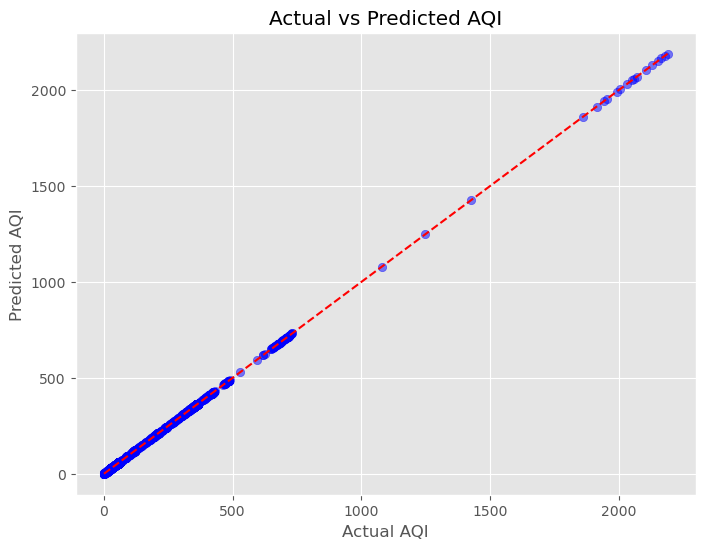

In [29]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI')
plt.show()


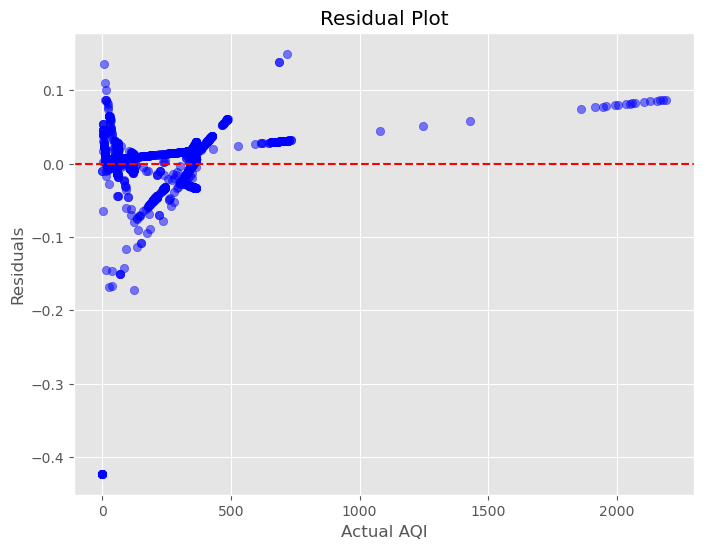

In [47]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual AQI')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [30]:
from sklearn.ensemble import BaggingRegressor

# Initialize the BaggingRegressor with the tuned MLPRegressor model
bagging_model = BaggingRegressor(base_estimator=mlp_model_tuned, n_estimators=10, random_state=42)

# Train the BaggingRegressor model on the selected features
bagging_model.fit(X_train_selected, y_train)

# Make predictions on the testing data with the BaggingRegressor model
y_pred_bagging = bagging_model.predict(X_test_selected)

# Evaluate the BaggingRegressor model's performance
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)

print("Mean Squared Error (Bagging Model):", mse_bagging)
print("R-squared (R2) score (Bagging Model):", r2_bagging)


Mean Squared Error (Bagging Model): 0.005117527116851581
R-squared (R2) score (Bagging Model): 0.99999986529936


In [32]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with the tuned MLPRegressor model
cv_scores = cross_val_score(mlp_model_tuned, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_mean = -cv_scores.mean()
cv_mse_std = cv_scores.std()

print("Cross-Validation Mean Squared Error:", cv_mse_mean)
print("Cross-Validation MSE Standard Deviation:", cv_mse_std)


Cross-Validation Mean Squared Error: 0.0017200504488352072
Cross-Validation MSE Standard Deviation: 0.000874166397039737


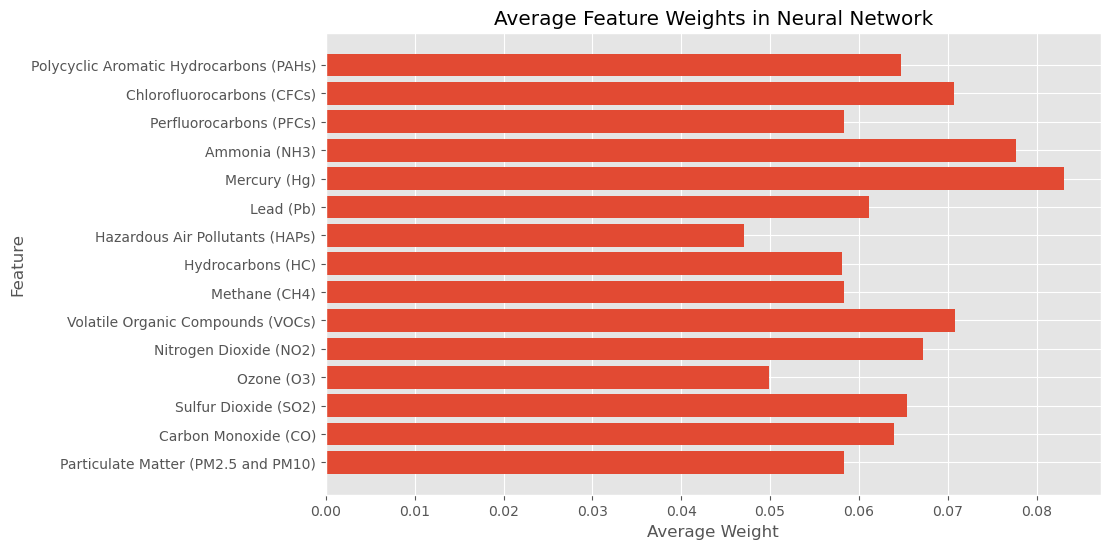

In [39]:
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# Initialize the MLPRegressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, random_state=42)

# Train the model on the training data
mlp_model.fit(X_train, y_train)

# Get the coefficients/weights for each feature
weights = mlp_model.coefs_[0]  # Weights from the input layer to the first hidden layer

# Check if the number of features matches the number of weights
if X_train.shape[1] != weights.shape[0]:
    print("Number of features doesn't match the number of weights.")
else:
    # Visualize the weights
    plt.figure(figsize=(10, 6))
    plt.barh(X_train.columns, weights.mean(axis=1))
    plt.xlabel('Average Weight')
    plt.ylabel('Feature')
    plt.title('Average Feature Weights in Neural Network')
    plt.show()



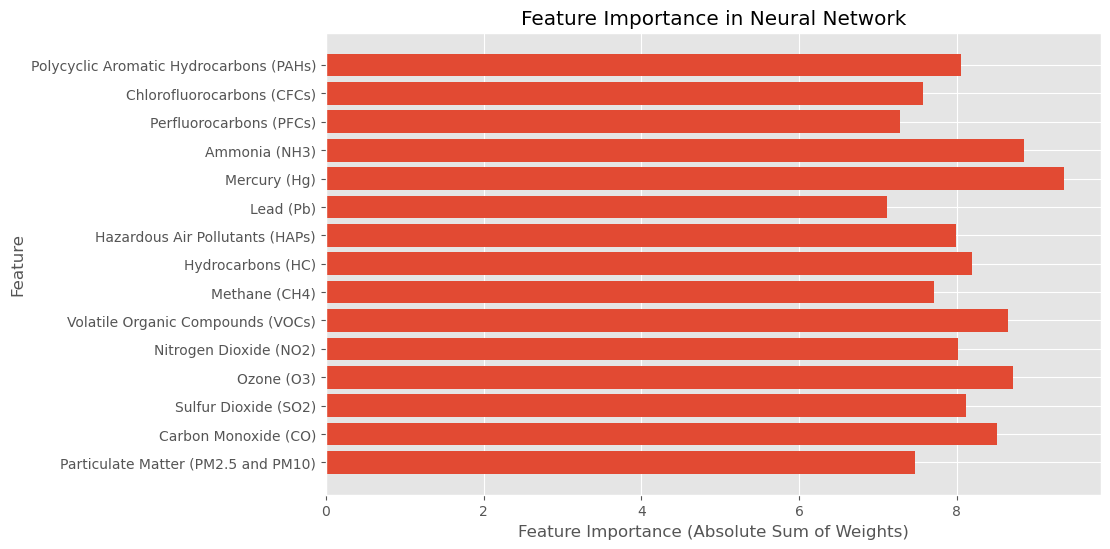

In [41]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt

# Initialize the MLPRegressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, random_state=42)

# Train the model on the training data
mlp_model.fit(X_train, y_train)

# Get the coefficients/weights for each feature
weights = mlp_model.coefs_[0]  # Weights from the input layer to the first hidden layer

# Calculate feature importance as the absolute sum of weights for each feature
feature_importance = np.abs(weights).sum(axis=1)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importance)
plt.xlabel('Feature Importance (Absolute Sum of Weights)')
plt.ylabel('Feature')
plt.title('Feature Importance in Neural Network')
plt.show()


In [45]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.neural_network import MLPRegressor

# Initialize the MLPRegressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, random_state=42)

# Select features using SelectKBest with mutual information scoring
k_best = SelectKBest(score_func=mutual_info_regression, k=5)
X_train_selected = k_best.fit_transform(X_train, y_train)
X_test_selected = k_best.transform(X_test)

# Fit the MLPRegressor model on the selected features
mlp_model.fit(X_train_selected, y_train)

# Get the selected features
selected_features = X_train.columns[k_best.get_support()]

print("Selected Features for Neural Network:")
print(selected_features)



Selected Features for Neural Network:
Index(['Particulate Matter (PM2.5 and PM10)', 'Sulfur Dioxide (SO2)',
       'Ozone (O3)', 'Volatile Organic Compounds (VOCs)',
       'Hazardous Air Pollutants (HAPs)'],
      dtype='object')


In [42]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation Scores:", cv_scores)


Cross-Validation Scores: [ -33.94107186  -13.5094234    -1.57146673 -463.37019733  -37.42302658]


In [48]:
# Identify top pollutants contributing to AQI
top_pollutants = selected_features[:5]
print("Top pollutants contributing to AQI:", top_pollutants)

# Implement measures to reduce emissions or mitigate the impact of top pollutants
# For example, enforce stricter emission standards, promote use of clean energy sources, implement green transportation initiatives, etc.


Top pollutants contributing to AQI: Index(['Particulate Matter (PM2.5 and PM10)', 'Sulfur Dioxide (SO2)',
       'Ozone (O3)', 'Volatile Organic Compounds (VOCs)',
       'Hazardous Air Pollutants (HAPs)'],
      dtype='object')


In [49]:
import joblib

# Replace 'model' with the name of your trained neural network model
joblib.dump(model, 'neural_network_model.pkl')


['neural_network_model.pkl']

In [47]:
import joblib

# Specify the full path including the filename
file_path = r'C:\Users\Emeka\Desktop\Air Quality\neural_network_model.pkl'

# Save the model
joblib.dump(model, file_path)


['C:\\Users\\Emeka\\Desktop\\Air Quality\\neural_network_model.pkl']

In [77]:
import joblib

# Load the trained model
model = joblib.load('neural_network_model.pkl')


In [141]:
import os

# Get the current working directory
current_dir = os.getcwd()
print("Current working directory:", current_dir)



Current working directory: C:\Users\Emeka


In [150]:
import joblib
import numpy as np
from ipywidgets import interact, widgets

# Load the trained model
loaded_model = joblib.load('neural_network_model.pkl')

# Function to accept inputs from the user
def get_user_inputs(city, year, **pollutants):
    user_inputs = [float(pollutants[pollutant]) for pollutant in pollutants]
    return user_inputs, year, city

# Function to determine AQI status
def get_aqi_status(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    elif aqi <= 150:
        return "Unhealthy for Sensitive Groups"
    elif aqi <= 200:
        return "Unhealthy"
    elif aqi <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

# Define cities
cities = [
    'New York', 'Tonawanda', 'Niagara Falls', 'Holtsville', 'Troy',
    'Lackawanna', 'Buffalo', 'Rochester', 'Olean', 'Cheektowaga', 'Albany',
    'Old Field', 'Babylon', 'Newburgh', 'Schenectady', 'Syracuse',
    'Scotchtown', 'East Farmingdale', 'Shirley', 'East Meadow', 'Millbrook',
    'Dunkirk', 'East Syracuse', 'Elmira', 'Westfield', 'Lansing (South Lansing)',
    'Amherst', 'Montgomery', 'Fulton', 'Camden', 'Riverhead', 'White Plains',
    'Middleport', 'Cedarhurst', 'Mamaroneck', 'Potsdam', 'Utica', 'Holbrook'
]

# Create dropdown menus for city and year
city_dropdown = widgets.Dropdown(
    options=cities,
    description='City:'
)

year_dropdown = widgets.Dropdown(
    options=[str(year) for year in range(2005, 2031)],
    description='Year:'
)

# Create input boxes for pollutant concentrations
pollutants_input_boxes = {pollutant: widgets.FloatText(value=0.0, description=pollutant) 
                           for pollutant in ['Particulate Matter (PM2.5 and PM10)', 'Carbon Monoxide (CO)',
                                             'Sulfur Dioxide (SO2)', 'Ozone (O3)', 'Nitrogen Dioxide (NO2)',
                                             'Volatile Organic Compounds (VOCs)', 'Methane (CH4)', 'Hydrocarbons (HC)',
                                             'Hazardous Air Pollutants (HAPs)', 'Lead (Pb)', 'Mercury (Hg)', 
                                             'Ammonia (NH3)', 'Perfluorocarbons (PFCs)', 'Chlorofluorocarbons (CFCs)',
                                             'Polycyclic Aromatic Hydrocarbons (PAHs)']}

# Create interactive widget
ui = widgets.VBox([city_dropdown, year_dropdown] + list(pollutants_input_boxes.values()))
out = widgets.interactive_output(get_user_inputs, {'city': city_dropdown, 'year': year_dropdown, **pollutants_input_boxes})

display(ui, out)

def predict_aqi(change):
    city = city_dropdown.value
    year = year_dropdown.value
    pollutants = {name: box.value for name, box in pollutants_input_boxes.items()}
    # Check if all pollutant values are entered
    if all(value != 0.0 for value in pollutants.values()):
        # Convert inputs to numpy array
        user_inputs, year, city = get_user_inputs(city, year, **pollutants)
        user_inputs_array = np.array(user_inputs).reshape(1, -1)

        # Predict AQI
        predicted_aqi = loaded_model.predict(user_inputs_array)[0]

        # Determine AQI status
        aqi_status = get_aqi_status(predicted_aqi)

        # Display the output
        print("Predicted AQI for", city, "in", year, ":", predicted_aqi)
        print("AQI Status:", aqi_status)
        
        # Reset pollutant input boxes
        for box in pollutants_input_boxes.values():
            box.value = 0.0
    else:
        print("Please enter values for all pollutants.")

predict_button = widgets.Button(description="Predict AQI")
predict_button.on_click(predict_aqi)
display(predict_button)


Output()

Button(description='Predict AQI', style=ButtonStyle())

Please enter values for all pollutants.
Predicted AQI for New York in 2005 : 1069.6441813288689
AQI Status: Hazardous
Predicted AQI for Babylon in 2026 : 48.984814656765565
AQI Status: Good


In [151]:
from flask import Flask, render_template, request, jsonify
import joblib

app = Flask(__name__)

# Load the trained model
loaded_model = joblib.load('neural_network_model.pkl')

# Function to classify AQI into different categories
def classify_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

@app.route('/')
def index():
    return render_template("index.html")

@app.route('/predict', methods=['POST'])
def predict():
    # Get the input values from the form
    inputs = [float(request.form[f'input_{i}']) for i in range(1, 16)]
    
    # Make predictions using the loaded model
    prediction = loaded_model.predict([inputs])[0]

    # Classify the predicted AQI
    status = classify_aqi(prediction)

    # Render the predict.html template and pass the prediction and status as template variables
    return render_template("predict.html", prediction=prediction, status=status)

if __name__ == '__main__':
    app.run(debug=False)



 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [21/Mar/2024 18:55:47] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [21/Mar/2024 18:56:23] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [21/Mar/2024 18:56:23] "GET /background.jpg HTTP/1.1" 404 -
